In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
pd.set_option('max_columns',99)
pd.set_option('max_rows',999)

In [3]:
# for i, f in enumerate(glob.glob('spiders/*.csv')):
#     df = pd.read_csv(f).iloc[:,1:]
#     if i == 0:
#         allreviews = df
#     else:
#         allreviews = allreviews.append(df, ignore_index=True)

# allreviews.date = pd.to_datetime(allreviews.date)

# allreviews.to_csv('allreviews.csv', index=False)

In [4]:
allreviews = pd.read_csv('allreviews.csv')

allreviews.date = pd.to_datetime(allreviews.date)

In [7]:
allreviews.head()

title  stars       date                                            r_title  \
0  Brave    3.0 2012-06-27  Beautiful looking film that doesn't match the ...   
1  Brave    5.0 2012-06-25                             Brave has little Heart   
2  Brave    1.0 2012-07-13                                       Disappointed   
3  Brave    4.0 2012-07-23          okay for a Disney movie, poor for a Pixar   
4  Brave    3.0 2012-08-05                                 Very disappointing   

                                                text  
0  This film is very beautifully done, the artist...  
1  I knew Brave was in trouble from the first few...  
2  I love The Incredibles, Up, Shrek, Toy Story, ...  
3  Pixar execs used to say that the story was ind...  
4  I felt compelled to write a review to counter ...

In [8]:
allreviews.date.agg([min,max])

min   1998-08-01
max   2018-01-16
Name: date, dtype: datetime64[ns]

In [9]:
allreviews.title.unique().size

202

In [10]:
allreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49133 entries, 0 to 49132
Data columns (total 5 columns):
title      49133 non-null object
stars      43524 non-null float64
date       49133 non-null datetime64[ns]
r_title    49133 non-null object
text       49133 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.9+ MB


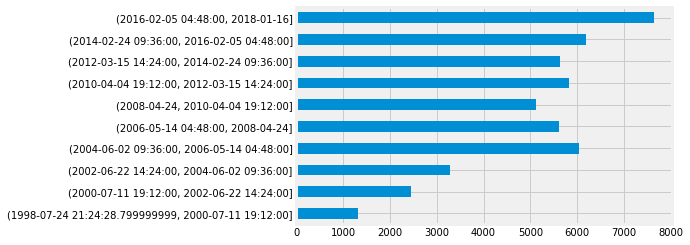

In [11]:
allreviews.date.value_counts(bins=10).sort_index().plot(kind='barh')

In [12]:
pd.crosstab(allreviews.title, allreviews.stars).style.background_gradient(axis=1)

In [13]:
allreviews.query("title=='The Lion King' and stars <2")

title  stars       date  \
4663  The Lion King    1.0 2016-09-06   
4700  The Lion King    1.0 2016-01-17   
5008  The Lion King    1.0 2000-05-09   
5013  The Lion King    1.0 2013-04-02   
5014  The Lion King    1.0 2007-07-01   
5069  The Lion King    1.0 2001-10-26   
5072  The Lion King    1.0 2017-03-24   
5095  The Lion King    1.0 2001-10-21   
5097  The Lion King    1.0 2006-07-03   
5103  The Lion King    1.0 2015-08-10   
5107  The Lion King    1.0 2014-04-30   
5111  The Lion King    1.0 2016-03-29   

                                                r_title  \
4663                     Okay...but massively overrated   
4700                                       A sweet joke   
5008                     Rip off of a great older anime   
5013  Enjoy over plain boiled rice with a piping hot...   
5014         whore of Babylon masked by a smiling mouse   
5069  this movie is horrible...i don't know what dis...   
5072                                             Awful.   
5095              Don't ask me why but this movie sucks   
5097                                   Two Thumbs Down!   
5103  The honest voice, of this movie being too old ...   
5107                                             Stupid   
5111                          Rip Off Cheap Dumb Movie!   

                                                   text  
4663  The Lion King is easily one of the most popula...  
4700  I will admit whether they are original cartoon...  
5008  This movie is a complete and shameless rip off...  
5013  The story of a spiteful lion from kenya who in...  
5014  Absolutely nasty bit of racist pandering, masq...  
5069  It sucks!!! it seriously does...ive seen crap ...  
5072  This is another unoriginal story and cartoon b...  
5095  The Lion King is one of the worst movies ever ...  
5097  This is one of the worst movies I have ever se...  
5103  This movie is way too overrated to be in the t...  
5107  Hyenas are now hated for this stupid movie. An...  
5111  The top 250 films of all time this apparently ...

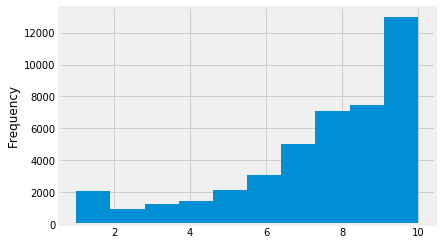

In [14]:
allreviews.stars.plot(kind='hist')

In [15]:
reviewsbyyear = allreviews.pivot_table('text','title',allreviews.date.dt.year,aggfunc=len).fillna(0)
reviewsbyyear['total'] = reviewsbyyear.sum(1)
reviewsbyyear.sort_values('total', ascending=False, inplace=True)

In [16]:
reviewsbyyear.sample(15)

date                          1998  1999  2000  2001  2002  2003  2004  2005  \
title                                                                          
The Master                     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
The Lost Thing                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Peter Pan                      0.0   3.0   3.0   1.0   3.0   8.0   4.0   5.0   
A Night at the Opera           3.0   5.0   3.0  13.0   6.0   8.0  10.0  15.0   
A Town Called Panic            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
The Killing of a Sacred Deer   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Kung Fu Panda 2                0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
The Florida Project            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Alice                          0.0   6.0   3.0   4.0   1.0   4.0   5.0   4.0   
Hotel Transylvania             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Madagascar: Escape 2 Africa    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Porco Rosso                    1.0   4.0   2.0   2.0   4.0   5.0   2.0  12.0   
Kubo and the Two Strings       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Loveless                       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Uncle                          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

date                          2006  2007  2008  2009  2010   2011   2012  \
title                                                                      
The Master                     0.0   0.0   0.0   0.0   0.0    0.0  161.0   
The Lost Thing                 0.0   0.0   0.0   0.0   1.0    5.0    2.0   
Peter Pan                     10.0   7.0   1.0   7.0   4.0    4.0    2.0   
A Night at the Opera          18.0   9.0  11.0   7.0   4.0    6.0    4.0   
A Town Called Panic            0.0   0.0   0.0   5.0  13.0    9.0    1.0   
The Killing of a Sacred Deer   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Kung Fu Panda 2                0.0   0.0   0.0   0.0   0.0  143.0   32.0   
The Florida Project            0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Alice                          8.0   5.0   7.0   5.0   5.0    5.0    3.0   
Hotel Transylvania             0.0   0.0   0.0   0.0   0.0    0.0   70.0   
Madagascar: Escape 2 Africa    0.0   0.0  54.0  37.0   8.0    4.0    4.0   
Porco Rosso                    9.0   5.0   7.0   4.0   5.0    3.0    8.0   
Kubo and the Two Strings       0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Loveless                       0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Uncle                          2.0   0.0   2.0   0.0   0.0    0.0    0.0   

date                           2013  2014  2015   2016   2017  2018  total  
title                                                                       
The Master                    179.0  35.0  18.0   11.0   19.0   0.0  423.0  
The Lost Thing                  1.0   1.0   1.0    1.0    0.0   0.0   12.0  
Peter Pan                       8.0   4.0   5.0    8.0    3.0   2.0   92.0  
A Night at the Opera            5.0   7.0   3.0    6.0    3.0   1.0  147.0  
A Town Called Panic             0.0   2.0   5.0    0.0    1.0   0.0   36.0  
The Killing of a Sacred Deer    0.0   0.0   0.0    0.0  172.0  55.0  227.0  
Kung Fu Panda 2                 7.0   4.0  11.0    9.0    5.0   0.0  211.0  
The Florida Project             0.0   0.0   0.0    0.0   85.0  27.0  112.0  
Alice                           6.0   3.0   0.0    2.0    4.0   0.0   80.0  
Hotel Transylvania             61.0  13.0  15.0    6.0    6.0   0.0  171.0  
Madagascar: Escape 2 Africa     4.0   2.0   3.0    2.0    5.0   0.0  123.0  
Porco Rosso                     4.0   6.0   6.0    3.0    4.0   0.0   96.0  
Kubo and the Two Strings        0.0   0.0   0.0  154.0   74.0   3.0  231.0  
Loveless                        0.0   0.0   0.0    0.0   17.0   0.0   17.0  
Uncle                           0.0   1.0   0.0    1.0    0.0   0.0    6.0